# S04 T01: Visualització gràfica d'un dataset

Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries **Matplotlib** i **Searborn**. 

## Nivell 1 - Exercici1

Resumeix gràficament el data set [DelayedFlights.csv](https://www.kaggle.com/giovamata/airlinedelaycauses)

Crea almenys una visualització per:

+ Una variable categòrica (UniqueCarrier) (1.1 i 1.2)
+ Una variable numèrica (ArrDelay) (1.3)
+ Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier) (1.4)
+ Dues variables numèriques (ArrDelay i DepDelay) (1.5)
+ Tres variables (ArrDelay, DepDelay i UniqueCarrier) (1.5)
+ Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier) (1.6).


In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#load the CSV into a DataFrame
vols = pd.read_csv('..\Sprint3\S03_T05_DelayFligths\DelayedFlights.csv')

In [82]:
# show first rows
vols.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


**1.1. Vizualització categòrica amb *Matplotlib*: UniqueCarrier**

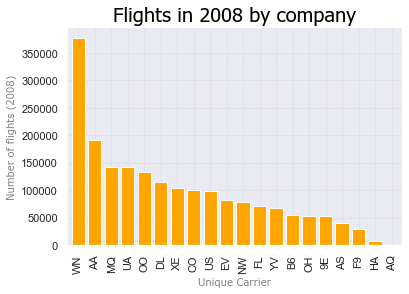

In [29]:
#create figure and axis objects
fig, ax = plt.subplots()

#the list of unique carriers names
companyia = vols["UniqueCarrier"].unique()

#flight count per unique carrier
vols_per_companyia = vols["UniqueCarrier"].value_counts()

#font type and colors
ft = {'family':'tahoma','color':'black','size':20}
fa = {'family':'verdana','color':'grey','size':10}

#title and axis titles
ax.set_xlabel("Unique Carrier", fontdict = fa)
ax.set_ylabel("Number of flights (2008)", fontdict = fa)
ax.set_title("Flights in 2008 by company", fontdict = ft)

#colors = np.array(range(0, 105, 5))
#print(colors)

#grid
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5)

#grafic bar
vols_per_companyia.plot(kind='bar', color = "orange", width = 0.8)

plt.savefig("1_1_1_barplot_matplotlib.png")

plt.show()

El mateix gràfic a l'estil **Lollipop**

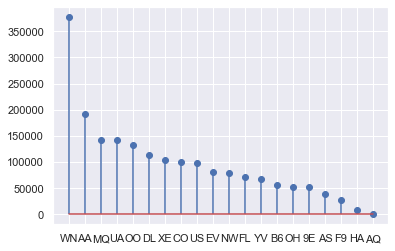

In [30]:
# Make the plot as Lolipop style
# vols_per_companyia is a pandas series, where the Unique carrier name is the index

plt.stem(vols_per_companyia.index, vols_per_companyia)
plt.savefig("1_1_2_lillipop_stem_seaborn.png")

La variable *vols_per_compnayia* és una serie ordenada, que és el que retorna un *value_counts()* sobre un dataframe.
Si l'imprimim, es veu que l'index és el nom de la companya, i el valor és el contador dels vols.
Per això, al fer el gràfic, si volem que surtin les etiquetes de la companyia, ho fem amb el *vols_per_companyia.index*.

In [213]:
print(vols_per_companyia[:3])
print("-------")
print(vols_per_companyia.index[:3])

WN    377602
AA    191865
MQ    141920
Name: UniqueCarrier, dtype: int64
-------
Index(['WN', 'AA', 'MQ'], dtype='object')


**1.2. Vizualització categòrica amb *Seaborn*: UniqueCarrier**

In [2]:
# import
import seaborn as sns

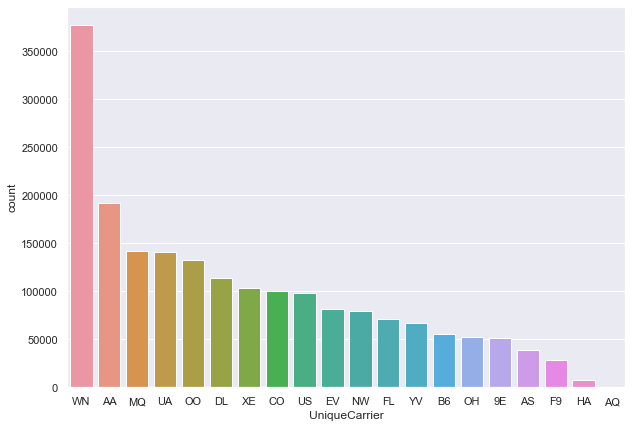

In [31]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart with the countplot
sns.countplot(x=vols.UniqueCarrier, data=vols.UniqueCarrier, order = vols["UniqueCarrier"].value_counts().index)

plt.savefig('1_2_countplot_seaborn.png')

El *countplot()* de Seaborn, fa el recompte dels valors categòrics. En aquest exemple, ho fem sobre la columna *UniqueCarrier*. En aquest cas, l'index és el que es genera automàticament, i el valor de cada fila és el nom de la companyia.
Per ordenar el gràfic pel count, hem d'utilitzar el paràmetre *order*, i en aquet cas, posar-hi l'index, tal i com s'explica en el gràfic de Lollipop.

**1.3. Vizualització d'una variable numèrica (ArrDelay)** amb *Seaborn*

Els valors de *ArrDelay* van des del valor mínim -109, fins al valor màxim 2461 minuts.
Filtrarem aquests valors i només en quedarem amb els valors positius = si que tenen retard, i també eliminarem els vols cancel·lats, ja que no porten retard, i també els vols amb més de 24h de retard (només 10 vols).

Farem una comparació del global de tots els delays i de la companyia NW, que és la que té més delays.

In [6]:
#cleanning cancelled flights and negative ArrDelays and delays bigger than 24h = 1440 min
vols2 = vols[(vols["Cancelled"] == 0) & (vols["ArrDelay"] > 0) & (vols["ArrDelay"] < 1440)]

#only choose one Unique Carrier to plot. i.e = "NW" --> the uniqueCarrier with higher delays is NW
uc = vols2[(vols2["UniqueCarrier"] == "NW")]


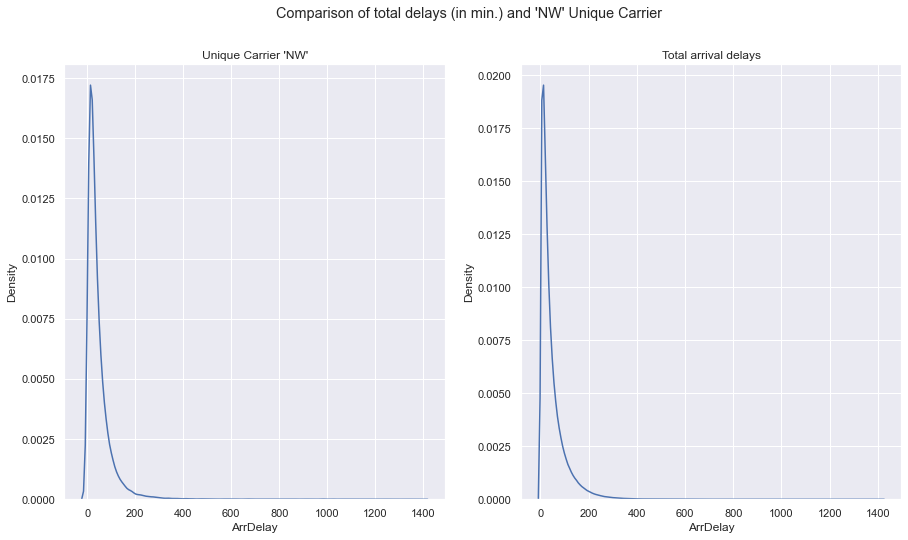

In [32]:
# Make default density plot with seaborn
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(15, 8))

#plot 1
plt.subplot(1, 2,1)
sns.kdeplot(uc["ArrDelay"])
plt.title("Unique Carrier 'NW'")

#plot 2
plt.subplot(1, 2, 2)
sns.kdeplot(vols2["ArrDelay"])
plt.title("Total arrival delays")
plt.suptitle("Comparison of total delays (in min.) and 'NW' Unique Carrier")

plt.savefig('1_3_kdeplot_seaborn.png')

plt.show()

He intentat fer el sharey entre els dos subplots, però no ho he aconseguit. Així hauria igualat els rangs dels dos eixos y.

**1.4. Vizualització d'una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)**

Partint dels gràfics anteriors, només agafarem els *ArrDelay* de mensy de 400 minuts, que són dels que n'hi ha més. Els de més retard són poc representatius, en el sentit que en un boxplot, el desvirtuen molt.

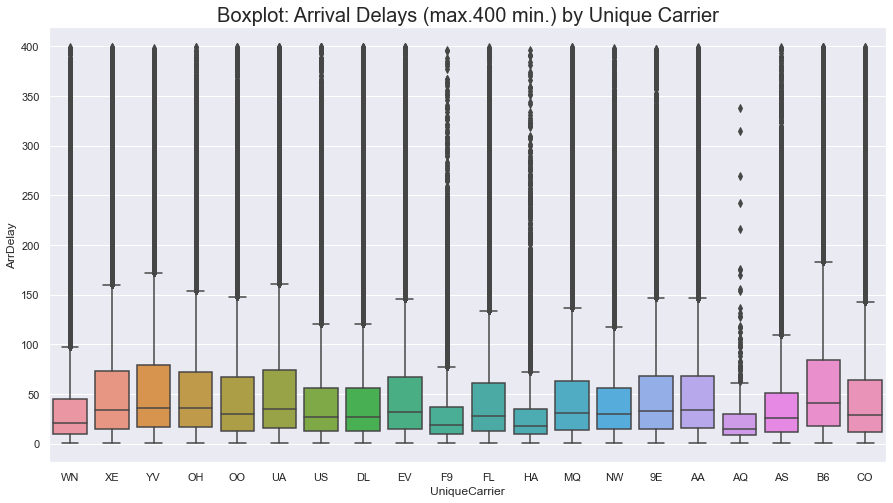

In [33]:
# first get the rows with ArrDelay < 400
vols_400 = vols2[vols2["ArrDelay"] < 400]

# Set the figure size
plt.figure(figsize=(15, 8))

sns.boxplot(x=vols_400["UniqueCarrier"], y=vols_400["ArrDelay"])
plt.title("Boxplot: Arrival Delays (max.400 min.) by Unique Carrier", fontsize = 20)

plt.savefig('1_4_boxplot_seaborn.png')

plt.show()

Com que només hem tingut en compte els vols amb retard real, per això no hi ha outliers mínims, sinó que tots els valors comencen a 0. Els màxims outliers, arriben tots a 400, perquè estem usant un dataframe filtrat així.

En la majoria de companyies, el 75 % dels vols no porta un retard superior a 1,5 hores (90 minuts). Només hi ha 4 comapnyies amb el 75% dels vols retrassats en menys de 50 minuts.

**1.5. Visualització de dues variables numèriques (ArrDelay i DepDelay) / Tres variables (ArrDelay, DepDelay, UniqueCarier)**

En aquest cas agafarem el dataframe *vols2* (sense els cancel·lats ni els que tenen un retard de més de 24 hores).
Per fer el gràfic calcularem les mitjanes d'ArrDelay i DepDelay per cada companyia amb un groupby().

In [35]:
avg_delay = vols2.groupby('UniqueCarrier')['ArrDelay', 'DepDelay'].mean()
print(type(avg_delay))

<class 'pandas.core.frame.DataFrame'>


<ipython-input-35-618417bda1ba>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_delay = vols2.groupby('UniqueCarrier')['ArrDelay', 'DepDelay'].mean()


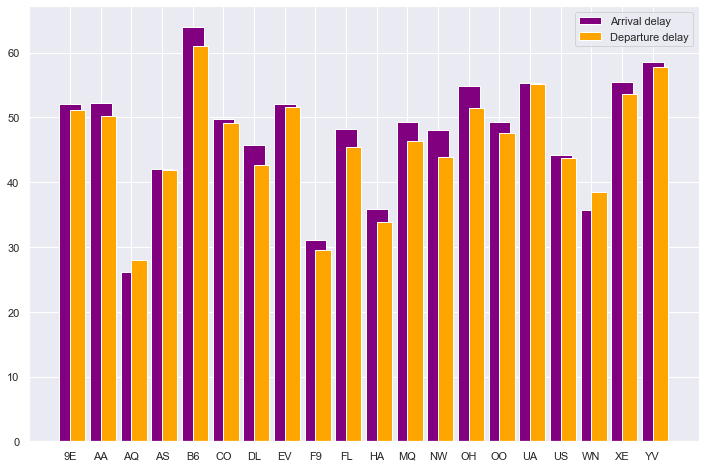

In [36]:
#avg_delay.plot.bar()
plt.figure(figsize=(12, 8))
plt.bar(avg_delay.index, avg_delay.ArrDelay, width = 0.7, color = 'purple', label = 'Arrival delay')
plt.bar(avg_delay.index, avg_delay.DepDelay, width = 0.5, align = 'edge', color = 'orange',label = 'Departure delay')
plt.legend()
plt.savefig("1_5_1_barplot_matplotlib.png")
plt.show()

En el gràfic superior, podem veure que la companyia B6 és la que té una mitjana superior de retards, tant en sortides com en arribades (pels voltants d'una hora). Mentre que AQ és la que menys retard acumula, amb una mitjana de 30 minuts.

En el gràfic següent, hem fet la mitjana de retrassos de sortida i arribada per cada mes de l'any 2008, i els posem dins del mateix gràfic lineal, en el temps.

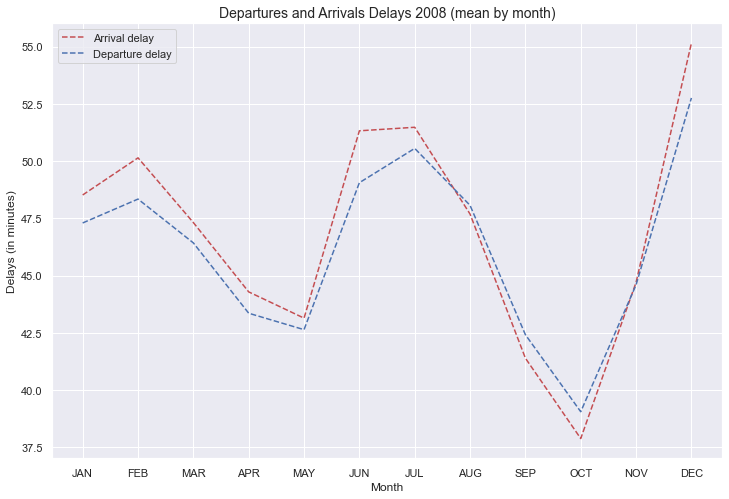

In [37]:
#calculate the means by month for ArrDelay and DepDelay
month_arrDelay = vols2.groupby('Month')['ArrDelay'].mean()
month_depDelay = vols2.groupby('Month')['DepDelay'].mean()
mesos = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

plt.figure(figsize=(12, 8))

plt.plot(mesos,month_arrDelay, 'r--', label = 'Arrival delay')
plt.plot(mesos,month_depDelay, 'b--', label = 'Departure delay')

#plt.plot(mesos,month_arrDelay, 'r--', mesos,month_depDelay, 'b--')


plt.xlabel('Month')
plt.ylabel('Delays (in minutes)')
plt.title('Departures and Arrivals Delays 2008 (mean by month)',  fontsize=14)

plt.legend()

plt.savefig("1_5_2_lineplot_matplotlib")

plt.show()


Podriem deduir que els mesos de l'any amb major moviment de gent (estiu i nadal), és quan hi ha més retards en els vols. Tot i que els mesos d'hivern, també poden estar influits per la climatologia, com la neu.

**1.6. Visualització de més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)**

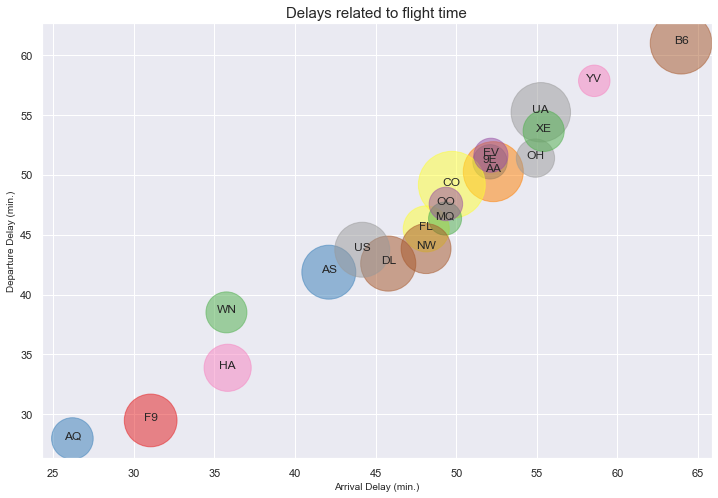

In [38]:
avg_adelay = vols2.groupby('UniqueCarrier')['ArrDelay'].mean()
avg_ddelay = vols2.groupby('UniqueCarrier')['DepDelay'].mean()
avg_flight = vols2.groupby('UniqueCarrier')['AirTime'].mean()

colors = np.random.randint(100, size=(20))

plt.figure(figsize=(12, 8))

plt.scatter(avg_adelay, avg_ddelay, s=avg_flight**1.65, c=colors, cmap='Set1', alpha = 0.5)

#labels in each bubble
for i in range(len(avg_adelay)):
    plt.text(x = avg_adelay[i], y = avg_ddelay[i], s = avg_adelay.index[i], ha = 'center')

#plt.colorbar()
plt.xlabel('Arrival Delay (min.)', fontsize = 10)
plt.ylabel('Departure Delay (min.)', fontsize = 10)
plt.title('Delays related to flight time', fontsize = 15)

plt.savefig("1_6_scatterplot_matplotlib.png")

plt.show()

En aquest gràfic, podem veure una claríssima correlació entre els retards de sortides i arribades (com és obvi que sigui). Cada bombolla o punt és una companyia, i el tamany del punt indica la durada mitjana dels vols de la companyia. En aquesta cas, veiem que no necessàriament, a més durada dels vols, més retards. El color, no té massa significat, excepte fer diferents les bombolles.

_____________________________________________________

### NIVELL 1 - EXERCICI 2

Exporta els gràfics com imatges o com html.

In [ ]:
#plt.savefig("figure.png")

Imatges:
+ 1_1_1_barplot_matplotlib.png
+ 1_1_2_lollipop_stem_seaborn.png
+ 1_3_kdeplot_seaborn.png
+ 1_4_boxplot_seaborn.png
+ 1_5_1_barplot_matplotlib.png
+ 1_5_2_lineplot_matplotlib.png
+ 1_6_scaterplot_matplotlib.png